# Get the Data

*Welcome to Machine Learning 50_Startups.! Your task is to predict prfit value of a certain startup projects in 3 USA states.

In [2]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

C:\Users\Mohamed Salah\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Take a Quick Look at the Data Structure

In [3]:
df.info()
# Only 1 categorical feature others are numericals 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isnull().mean() * 100
# No missing values 

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

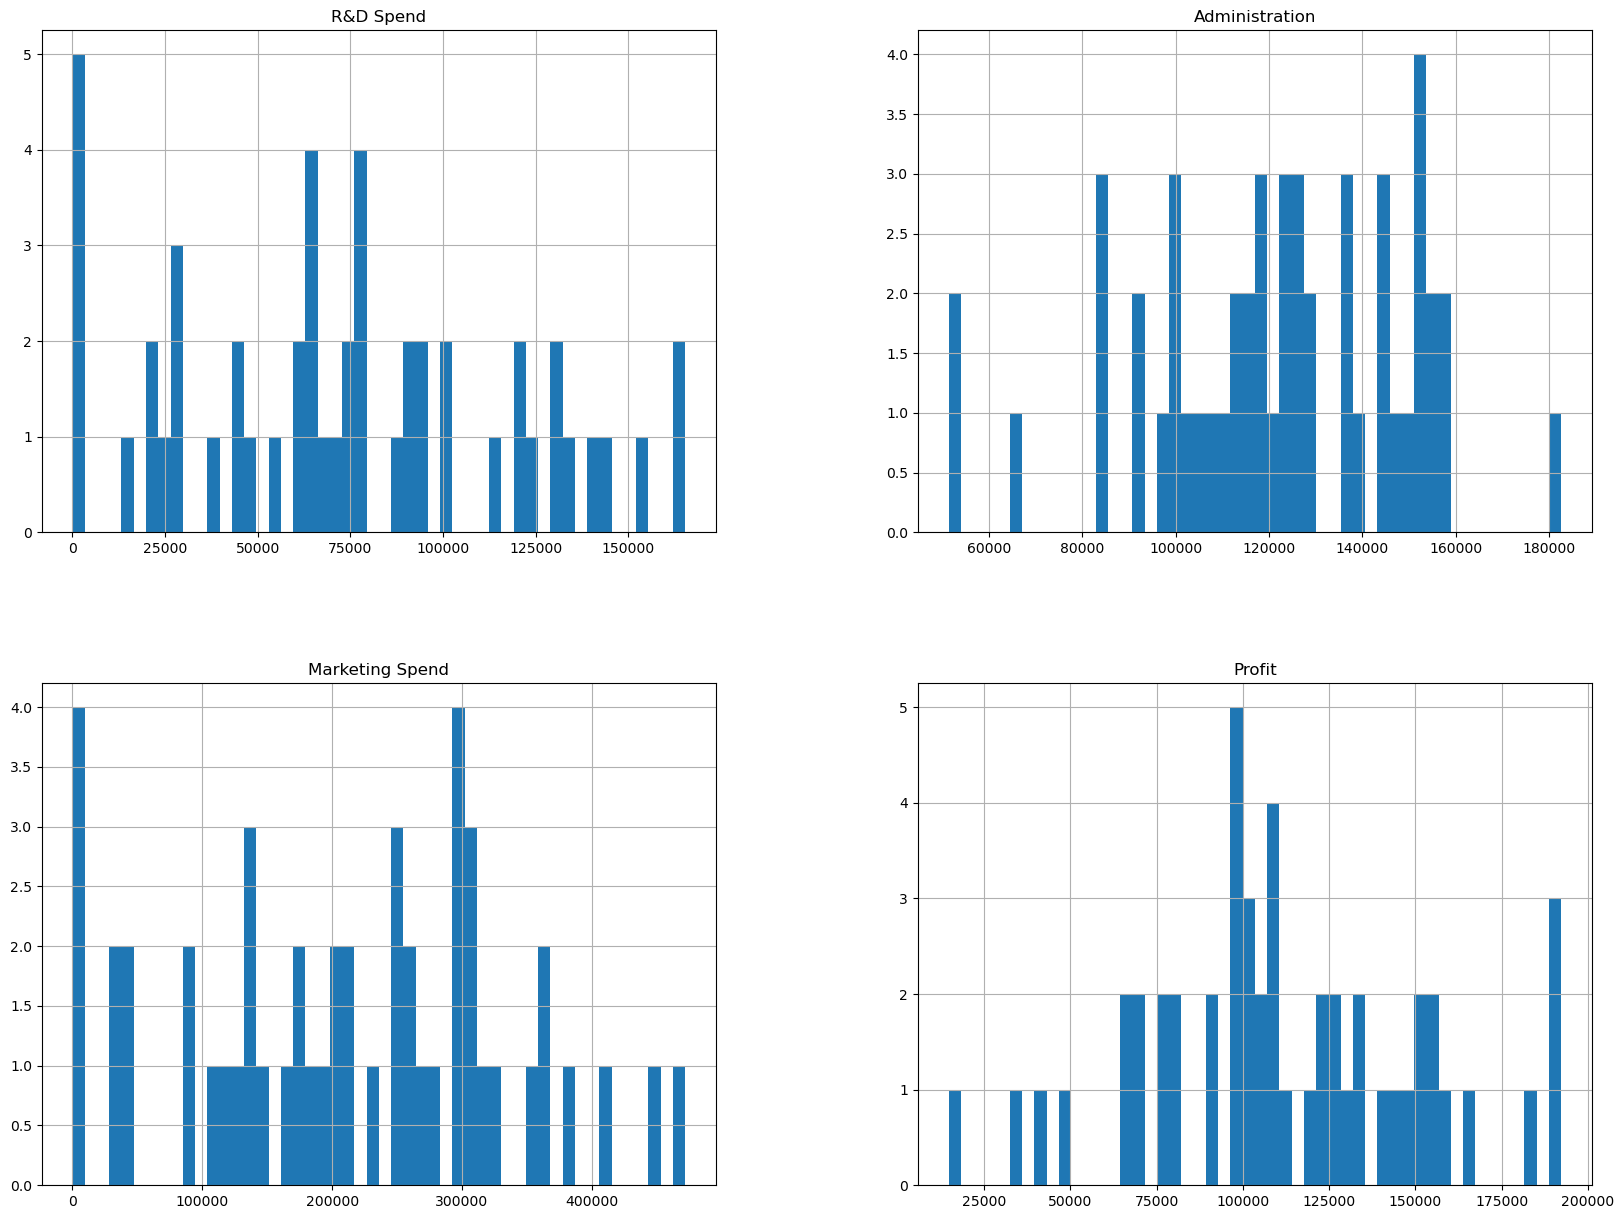

In [8]:
# Histograms
df.hist(bins=50, figsize=(20,15));

## Create a Test Set

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) # random_state is used for reproducibility

In [10]:
train_set.shape, test_set.shape

((40, 5), (10, 5))

# EDA

In [12]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
df.corr(numeric_only=True)["Profit"].sort_values(ascending=False)
# R&D Spend  and Marketing Spend has the highiest correclation 

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

In [19]:
fig1= px.scatter(train_set, x="R&D Spend", y="Profit", title="R&D Spend Vs Profit ", width=400, height=300)
fig2= px.scatter(train_set, x="Marketing Spend", y="Profit", title="Marketing Spend Vs Profit ", width=400, height=300)
fig1.show() ,fig2.show()

(None, None)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

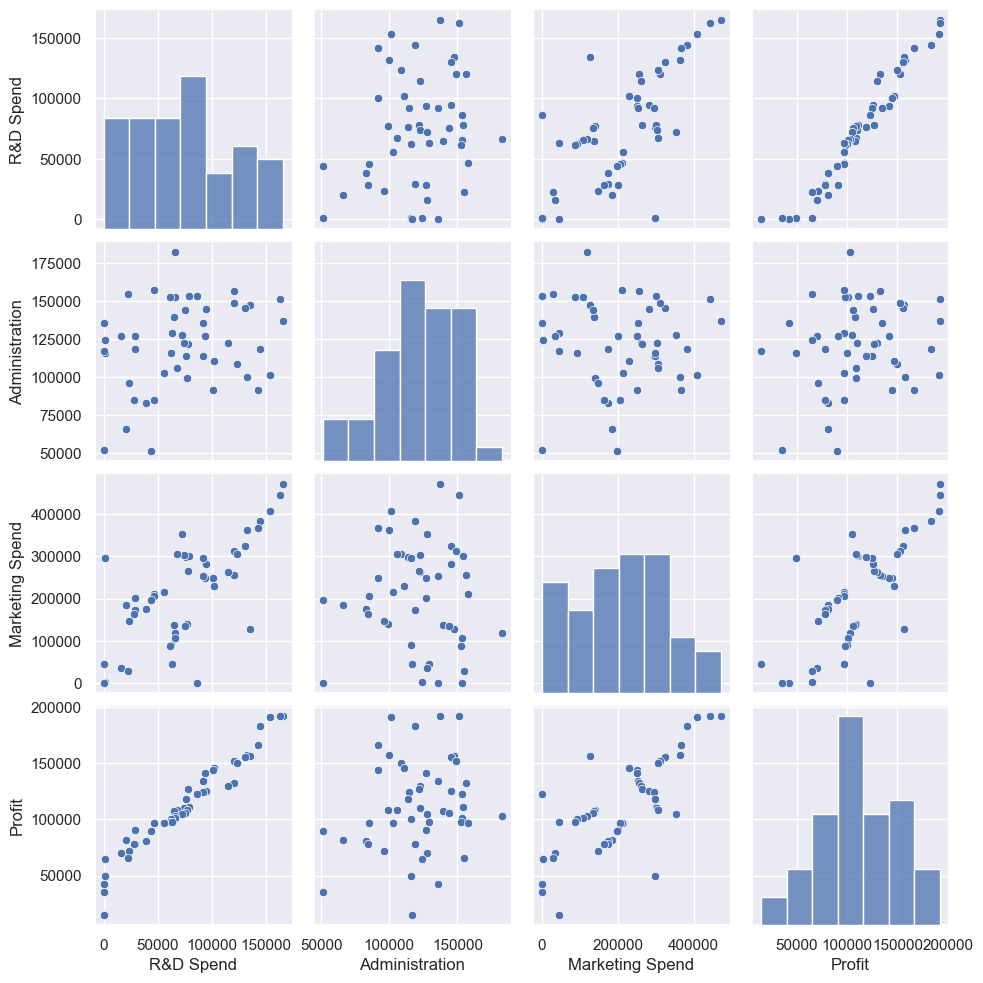

In [15]:
# pairplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
sns.pairplot(df);

        The most promising attribute to predict the profit value is R&D Spend

# Prepare the Data for Machine Learning Algorithms

In [25]:
# Split the data into features and labels

train_features = train_set.drop("Profit", axis=1)
train_labels = train_set["Profit"].copy()

In [26]:
train_features

,R&D Spend,Administration,Marketing Spend,State
12,93863.75,127320.38,249839.44,Florida
4,142107.34,91391.77,366168.42,Florida
37,44069.95,51283.14,197029.42,California
8,120542.52,148718.95,311613.29,New York
3,144372.41,118671.85,383199.62,New York
6,134615.46,147198.87,127716.82,California
41,27892.92,84710.77,164470.71,Florida
46,1315.46,115816.21,297114.46,Florida
47,0.00,135426.92,0.00,California
15,114523.61,122616.84,261776.23,New York


# Transformation Pipelines

        There are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations.

In [23]:
train_features.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [27]:
# Final Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer



# num_pipeline

num_pipeline = Pipeline([ ("imputer", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler()),
                        ])

num_attribs = ['R&D Spend', 'Administration', 'Marketing Spend']
cat_attribs = ["State"]

""" Anther way to build num_attribs , cat_attribs
num_attribs = train_features.select_dtypes(exclude='object').columns.tolist()
cat_attribs = train_features.select_dtypes(include='object').columns.tolist() """

full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs),
                                    ("cat", OneHotEncoder(sparse= False, drop = 'first'), cat_attribs),
                                  ])

train_features_prepared = full_pipeline.fit_transform(train_features)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [28]:
train_features_prepared

array([[ 0.34202149,  0.22787678,  0.12425038,  1.        ,  0.        ],
       [ 1.36207849, -1.0974737 ,  1.14990688,  1.        ,  0.        ],
       [-0.71081297, -2.5770186 , -0.34136825,  0.        ,  0.        ],
       [ 0.90611438,  1.0172367 ,  0.66890185,  0.        ,  1.        ],
       [ 1.40997088, -0.09115403,  1.30006861,  0.        ,  1.        ],
       [ 1.20367103,  0.96116332, -0.95248784,  0.        ,  0.        ],
       [-1.05285826, -1.34392538, -0.62843389,  1.        ,  0.        ],
       [-1.61480906, -0.19649414,  0.54106768,  1.        ,  0.        ],
       [-1.642623  ,  0.52691442, -2.07854935,  0.        ,  0.        ],
       [ 0.77885123,  0.05437051,  0.2294954 ,  0.        ,  1.        ],
       [ 0.96515572, -0.45976843,  0.61043134,  0.        ,  0.        ],
       [ 0.00687736,  0.01677049,  0.25215324,  0.        ,  0.        ],
       [-0.01361318, -0.80643974, -0.83912073,  0.        ,  1.        ],
       [-0.66099544,  1.34830937, -0.2

# Select and Train a Model
# Linear Regression

        Profit =  w0 + w1 * R&D Spend
                     + w2 * Administration
                     + w3 * Marketing Spend


In [30]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_features_prepared, train_labels)

# Predictions
lin_reg_predictions = lin_reg.predict(train_features_prepared)

In [31]:
# Training Accuracy
from sklearn.metrics import r2_score
print("Linear Regression Accuracy: ", r2_score(train_labels, lin_reg_predictions))

Linear Regression Accuracy:  0.9537019995248526


In [32]:
# Cross Validation for Linear Regression

from sklearn.model_selection import cross_val_score
lin_reg_scores = cross_val_score(lin_reg, train_features_prepared, train_labels, scoring="r2", cv=10)

print("Linear Regression Accuracy: ", lin_reg_scores)
print("Linear Regression Accuracy: ", round(lin_reg_scores.mean(),2))
print("Linear Regression Standard Deviation: ", round(lin_reg_scores.std(),2))

Linear Regression Accuracy:  [0.9226481  0.97501191 0.93143071 0.96694209 0.9408353  0.93863795
 0.9631974  0.93125019 0.87182566 0.70645281]
Linear Regression Accuracy:  0.91
Linear Regression Standard Deviation:  0.07


In [33]:
# Testing Accuracy

test_features = test_set.drop("Profit", axis=1)
test_labels = test_set["Profit"].copy()

test_features_prepared = full_pipeline.transform(test_features)
lin_reg_predictions_test = lin_reg.predict(test_features_prepared)  # direct predict no fit for test data (fit only for train data)


print("Linear Regression Accuracy on Test Data: ", r2_score(test_labels, lin_reg_predictions_test))



Linear Regression Accuracy on Test Data:  0.8987266414319837


# save linear regression model &  Save Pipeline


In [34]:
import joblib
joblib.dump(lin_reg, "50_startup_lin_reg.pkl")


import joblib
joblib.dump(full_pipeline, "50_startup_full_pipeline.pkl")

['50_startup_full_pipeline.pkl']

## Web App

In [76]:
%%writefile startup_profit_app.py

import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load the model
lin_reg = joblib.load("50_startup_lin_reg.pkl")

# Load the pipeline
full_pipeline = joblib.load("50_startup_full_pipeline.pkl")

# Load the data
df = pd.read_csv("50_Startups.csv")

# Create a title and sub-title
st.title(" Welcome to my 1st ML App ")

st.write("""
This app predict profit value of a certain startup project within 3 USA states**!
""")

# Take the input from the user
RD_Spend = st.number_input("R&D Spend", min_value= float(df['R&D Spend'].min()), max_value=float(df['R&D Spend'].max()), value= 165349.2)
Administration = st.number_input("Administration Spend", min_value= float(df['Administration'].min()), max_value=float(df['Administration'].max()), value= 136897.8)
Marketing_Spend = st.number_input("Marketing Spend", min_value= float(df['Marketing Spend'].min()), max_value=float(df['Marketing Spend'].max()), value= 471784.1)
State = st.selectbox('Select your State', ('New York', 'California', 'Florida'))

# Store a dictionary into a variable
user_data = {'R&D Spend': RD_Spend,
'Administration': Administration,
'Marketing Spend': Marketing_Spend,
'State': State}


# Transform the data into a data frame
features = pd.DataFrame(user_data, index=[0])

# Pipeline
features_prepared = full_pipeline.transform(features)

# Predict the output
prediction = lin_reg.predict(features_prepared)[0]

# Set a subheader and display the prediction
st.subheader('Profit Prediction')
st.markdown('''# $ {} '''.format(round(prediction), 2))

Overwriting startup_profit_app.py


In [77]:
!python -m streamlit run startup_profit_app.py 

^C


# To RUN the web app from cmd terminal 
  ### python -m streamlit run startup_profit_app.py 

      